# NetCDF and imaging arrays <img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">

<div class="alert alert-success">
<h2>Introduction</h2>
</div>

This notebook exercise involves import of `NetCDF` format 2D data, and plotting that data firstly as an image, then as a 3D surface, exploring the range of colour palettes available in `matplotlib`.

* NetCDF: [project home](http://www.unidata.ucar.edu/software/netcdf/)
* `matplotlib`: [online documentation](http://matplotlib.org/)

You will import self-describing 2D array data in `NetCDF` format, using the `scipy` Python libraries. You will use `matplotlib` to display the data as an image (or heatmap) with a range of colour palettes, to investigate how the use of colour can aid or hinder interpretation. Finally, you will render 2D array data as a 3D surface plot, and explore how to use `matplotlib`'s 3D axes and lighting effects to display your data more effectively.

![3D surface plot](images/intro_image.png)

#### Python imports

The code in the cell below suppresses noisy warnings from some of the `matplotlib` plotting functions.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Learning Outcomes

* Read and use NetCDF format data using Python
* Visualise array data as a heatmap/image
* Explore array data visualisation with a range of colour palettes, and understand how selection and normalisation of colour palettes can influence the interpretation of data
* Visualise 2D array data as a 3D surface plot
* Explore the application and influence of colour palettes and lighting effects on the interpretation of 3D surface plots

<div class="alert alert-success">
<h2>Exercise</h2>
</div>

<div class="alert alert-success">
<h3>1. Reading NetCDF data</h3>
</div>

#### Introduction

You are being provided data in NetCDF (Network Common Data Format) form. The term NetCDF refers both to the data format itself, and the set of software libraries that read and write the data. The aim of this set of libraries and formats is to allow for better exchange of self-describing, array-oriented data. You can read more about this endeavour at the links below:

**NetCDF links**
* [Wikipedia](https://en.wikipedia.org/wiki/NetCDF)
* [Project home page](http://www.unidata.ucar.edu/software/netcdf/)

As part of the exercise is to see how effective use of colour palettes can be a hindrance as well as a help to interpretation of datasets, the identity and origin of the dataset will not be disclosed directly in this text (but you'll probably work it out quite quickly, anyway).

The data is a 1121x1141 *xy* grid, each having a single *z* data point: i.e. a standard two-dimensional array.

#### Python imports

The `SciPy` module for working with NetCDF data is `scipy.io.netcdf`, and can be loaded with:

```python
from scipy.io import netcdf
```

In [2]:
# Import SciPy's netcdf module
from scipy.io import netcdf

#### Data location

The input NetCDF data is in the repository's `data` directory, with the name `GMRTv3_2_20160710CF.grd`. For convenience, this location is assigned to the variable `infile` in the cell below.

In [3]:
# Define the location of the input NetCDF4 data
infile = "../../data/GMRTv3_2_20160710CF.grd"

The NetCDF file at the location indicated by `infile` can then be read in to the variable `dataset` using the `netcdf` module's `netcdf_file()` function:

```python
data = netcdf.netcdf_file(infile, 'r')
```

<div class="alert alert-warning">
<b>NOTE:</b> for those of you working with large datasets, you may want to read more about <b>SciPy</b>'s ability to work with memory-mapped NetCDF files on disk. Other than taking care with opening or closing files that are 'live', the rest of this exercise would be unchanged if you worked with memory-mapped data.
</div>

* `SciPy`'s `netcdf` module reference: [link](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.io.netcdf.netcdf_file.html)

In [4]:
# Load the NetCDF dataset as the variable `dataset`
data = netcdf.netcdf_file(infile, 'r')

All NetCDF variables are contained in the `.variables` attribute of the dataset:

```python
data.variables
```

This is accessed like any other dictionary:

```python
data.variables['lat']
```

In [5]:
# Inspect the dataset's variables
data.variables

{'altitude': <scipy.io.netcdf.netcdf_variable at 0x10cec7b00>,
 'lat': <scipy.io.netcdf.netcdf_variable at 0x10cec7a20>,
 'lon': <scipy.io.netcdf.netcdf_variable at 0x10cec7a58>}

The self-describing nature of NetCDF is visible in `SciPy`. For example, the imported `dataset` has a `.history` attribute, and each variable has `.units` attribute, that can be accessed readily. These attributes contain `bytes` data, rather than raw strings, so need to be `decode`d in `UTF-8`:

```python
print(dataset.history.decode("utf-8"))
print(dataset.variables['lon'].units.decode("utf-8"))
```

In [6]:
# Inspect the dataset's history, and variable units
print(data.history.decode("utf-8"))

Projection: Cylindrical Equidistant
Extracted from the Global Multi-Resolution Topgraphy (GMRT) Synthesis v2.7
http://gmrt.marine-geo.org
Created with GMRT GridServer
http://www.marine-geo.org/tools/gridserverinfo.php


Working with the imported data directly, you need to be aware that this is the `scipy.io.netcdf.netcdf_variable` datatype. In keeping with the NetCDF philosophy, this datatype provides self-descriptive information.

```python
type(dataset.variables['altitude'])
dataset.variables['altitude'].__dict__
```

In [7]:
# Inspect the dataset's variable datatype
data.variables['lon'].__dict__

{'_attributes': {'actual_range': array([-13.5       ,   6.59179688]),
  'long_name': b'longitude',
  'units': b'degree_east'},
 '_shape': (1143,),
 '_size': 8,
 '_typecode': 'd',
 'actual_range': array([-13.5       ,   6.59179688]),
 'data': array([-13.5       , -13.48240648, -13.46481297, ...,   6.55660984,
          6.57420336,   6.59179687]),
 'dimensions': ('lon',),
 'long_name': b'longitude',
 'maskandscale': False,
 'units': b'degree_east'}

Some operations that you might expect to work for a `NumPy` array are not available for the `netcdf_variable` object, but the underlying object in the `.data` attribute is a standard `numpy.ndarray`, and this can often be used directly.

<div class="alert alert-success">
<h3>2. Visualising NetCDF/array data as an image</h3>
</div>

#### Introduction

The NetCDF data we have loaded contains the variable `altitude`, which is a 1121x1143 array of `float64` values. This data format is compatible with the most common base graphics library in Python: `matplotlib`, and we can represent this data directly without further modification.

* `matplotlib`: [http://matplotlib.org/](http://matplotlib.org/)

`matplotlib` is one component in the `pylab`/`SciPy` enterprise: an attempt to make Python an environment for scientific computing at least as powerful as commercial alternatives, such as `MatLab`. The Jupyter notebook we are using provides *magics* which allow for integration of these tools into the notebook as though we were using, for example, the `MatLab` IDE.

* `SciPy`: [https://www.scipy.org/](https://www.scipy.org/)
* *magics*: [https://ipython.org/ipython-doc/3/interactive/magics.html](https://ipython.org/ipython-doc/3/interactive/magics.html)

For the rest of this exercise, we will use the notebook with the following *magic*:

```python
%pylab inline
```

`%pylab` by itself would enable all the functions of `SciPy`/`NumPy`/`matplotlib`, but by using the additional argument `inline`, we are also able to render graphical output directly within the notebook.

<div class="alert alert-danger">
<b>NOTE:</b> this approach of rendering graphics inline has the advantage of being flexible and placing graphics next to the code that generates them, rather than in an extra window or tab. It also avoids some problems that can occur when using Python in virtual environments on OSX, where specific *Framework* versions of graphics libraries may need to be installed and used (but unavailable in the virtual environment) to render images.
</div>

#### Setting up `pylab`

To set up `pylab`, we run a cell containing the line:

```python
%pylab inline
```

In [8]:
# Run the pylab magic in this cell.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Visualising array data

The simplest way to display 2D array data is as an *image* (this is how uncompressed image data is often stored). This treats the array as pixels, where each cell value relates to some representative aspect of the pixel, such as greyscale intensity, or luminance.

<div class="alert alert-warning">
The task of visualisation here is to relate cell values to a meaningful visualisation aid to understanding and interpretation, such as colour. This is done by <i>mapping</i> cell values to colour values, often using a <i>colormap</i>.
</div>

* Image file formats: [Wikipedia](https://en.wikipedia.org/wiki/Image_file_formats)
* `matplotlib` colormap reference: [http://matplotlib.org/examples/color/colormaps_reference.html](http://matplotlib.org/examples/color/colormaps_reference.html)

To represent array data as an image, `matplotlib` provides the function `imshow()` (now available in cells due to the `%pylab` magic). You can find out more about this function by inspecting its help documentation in the cell below, using:

```python
help(imshow)
```

In [9]:
# Use this cell to obtain help for the imshow() function
#help(imshow)

You can obtain a default image representation of the data in `data.variables['altitude']` using `imshow()` - and an accompanying `colorbar` to aid interpretation - with:

```python
imshow(data.variables['altitude'].data, origin='lower')
colorbar()
```

<div class="alert alert-danger">
<b>NOTE:</b> for <b>imshow()</b> we need to pass the <b>.data</b> attribute, as it expects an <b>ndarray</b>.
</div>

<div class="alert alert-danger">
<b>NOTE:</b> by default, <b>matplotlib</b> places the origin of image data at the top left of the image. For this dataset, the origin is at the lower left, so we supply the <b>origin='lower'</b> argument.
</div>

In [10]:
# Use imshow() to produce a default representation of data['altitude']
imshow(data.variables['altitude'].data, origin='lower')
colorbar();

By default, prior to V2.0, `matplotlib` uses the colormap `rainbow`. Post v2.0, the `viridis` colormap will be used. We can get a sneak preview of how this image would appear in v2.0+ of `matplotlib`, by specifying the colormap `'viridis'` when we call `imshow()`:

```python
imshow(data.variables['altitude'].data, origin='lower', cmap='viridis')
```

In [11]:
# Display the image using the 'viridis' colormap
imshow(data.variables['altitude'].data, origin='lower', cmap='viridis')
colorbar();

***QUESTION:*** Now that it should be obvious what the dataset represents, do you think these two default colourschemes deliver insight or meaningful representation of the data? And, if not, why not?

<div class="alert alert-success">
<h3>3. Colormaps</h3>
</div>

#### Introduction

The purpose of a colormap is to represent values of your dataset in 3D colour space. The difficult part is finding a suitable mapping that represents your data well and either provides insight into your dataset, or helps communicate an aspect of your dataset to the reader.

There is no universally 'best' colormap, but answering some questions about your data may help you choose a suitable colormap:

<div class="alert alert-warning">
<ol>
<li> Are you representing continuous or categorical data? (e.g. dominant organism vs. extent of diversity)
<li> Is there a critical value from which other values deviate, that should be highlighted? (e.g. house price threshold)
<li> Is there an intuitive colour scheme for what you are plotting? (e.g. green for land, blue for sea; political party colours)
<li> Is there a standard for this kind of plot, which the reader will expect? (e.g. topological colouring)
</ol>
</div>

* Why should engineers and scientists be worried about colour? [link](http://www.research.ibm.com/people/l/lloydt/color/color.HTM)

#### Classes of colormap

Colormaps can be split into four main classes, all of which have representatives in `matplotlib`:

1. Sequential
2. Diverging
3. Qualitative
4. Miscellaneous

<div class="alert alert-warning">
<b>Sequential colormaps</b>
</div>

Sequential colormaps increase monotonically in lightness, progressing from low to high values. This is helpful, as humans perceive changes in lightness more easily than differences in hue (colour). Where this difference in lightness is *perceptually uniform*, equal changes in lightness represent equal changes in data value.

***For these colormaps, lighter pixels have higher values***

<img src="images/lightness_00.hires.png" style="width: 450px; float: center;">
<img src="images/lightness_01.hires.png" style="width: 450px; float: center;">

There is a class of sequential colormaps whose change in lightness is not monotonic, but can plateau (same lightness, change in hue), or even vary up and down. These colormaps can result in the reader perceiving a *banding* in the image that does not reflect properties of the data, as lightness does not change along with the data values.

***For these colormaps, visible banding effects may not represent a meaninful similarity between datapoints***

<img src="images/lightness_02.hires.png" style="width: 450px; float: center;">

* Discussion of *banding* effects: [link](https://mycarta.wordpress.com/2012/10/14/the-rainbow-is-deadlong-live-the-rainbow-part-4-cie-lab-heated-body/)

To explore these colormap effects, we can visualise our data using colormaps from all three sequential colormap groupings using the helper function `compare_colormaps()` (defined below):

```python
cmaps = ('viridis', 'inferno', 'plasma',
         'Blues', 'GnBu', 'YlGnBu',
         'afmhot', 'cool', 'spring')
compare_colormaps(data.variables['altitude'].data, cmaps)
```

In [12]:
# Helper function to render comparative subplot images
# Use this in the cells below to inspect the effects of changing colormaps

# Required to place colorbar scales in the subplot
# see, e.g.
# http://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Function to render data with a range of colormaps
def compare_colormaps(data, cmaps):
    """Renders the passed array data using each of the passed colormaps
    
    - data: array-like object that can be rendered with imshow()
    - cmaps: iterable of matplotlib colormap names
    
    Produces a matplotlib Figure showing the passed array-like data,
    rendered using each colormap in cmaps, with an associated colorbar
    scale.
    """    
    # Create n x 3 subplots, ready to render data
    nrows = 1 + (len(cmaps) // 3)  # // is integer division
    if not len(cmaps) % 3:  # Correct number of rows for multiples of 3
        nrows -= 1
    fig, axes = subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))
    subplots_adjust(wspace=0.3, hspace=0.1)  # Allow space for colorbar scales
    
    # Create one subplot per colormap
    for idx, cmap in enumerate(cmaps):
        # cm.cmap_d contains a dictionary of allowed colormaps
        assert cmap in cm.cmap_d, "colormap %s is not recognised" % cmap
        # Identify the axis to draw on
        row, col = (idx // 3, idx % 3)
        if len(cmaps) > 3:
            ax = axes[row][col]
        else:
            ax = axes[col]
        # Draw data
        img = ax.imshow(data, origin='lower', cmap=cmap)
        ax.set_title(cmap)  # set plot title
        # Draw a colorbar scale next to the image data
        div = make_axes_locatable(ax)  # link to data image axis
        cax = div.append_axes("right", size="5%", pad=0.05)  # define axis for scale
        colorbar(img, cax=cax)  # draw scale
        
    # Remove unused axes
    for i in range(idx + 1, 3 * nrows):
        row, col = (i // 3, i % 3)
        if len(cmaps) > 3:
            fig.delaxes(axes[row][col])
        else:
            fig.delaxes(axes[col])

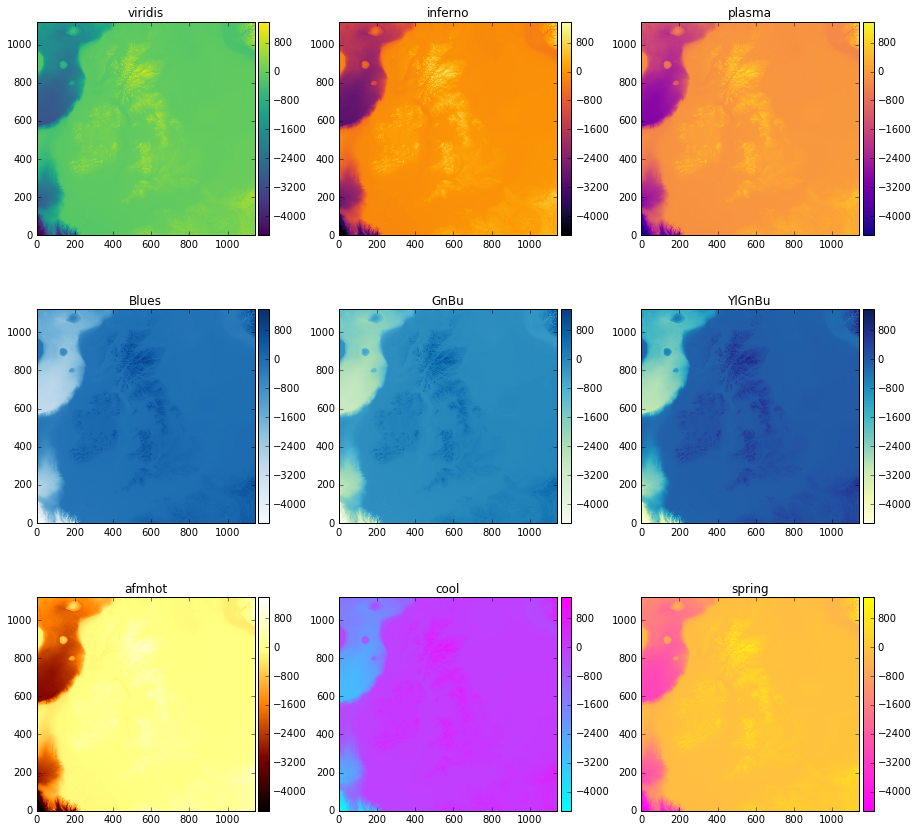

In [13]:
# Compare colormaps using the compare_colormaps() function (defined above)
cmaps = ('viridis', 'inferno', 'plasma',
         'Blues', 'GnBu', 'YlGnBu',
         'afmhot', 'cool', 'spring')
compare_colormaps(data.variables['altitude'].data, cmaps);

<div class="alert alert-warning">
<b>Divergent colormaps</b>
</div>

Divergent colormaps express the concept of a *critical value*. From low data values to the *critical value*, lightness increases monotonocally. From the *critical value* to high data values, lightness decreases monotonically. Clearly, this is most appropriate if the critical value has a useful meaning in the context of the dataset.

***For these colormaps, the choice of critical value should reflect a meaningful threshold in the data***

<img src="images/lightness_03.hires.png" style="width: 450px; float: center;">

We can again visualise our data using a range of divergent colormaps using the helper function `compare_colormaps()`:

```python
cmaps = ('bwr', 'coolwarm', 'spectral')
compare_colormaps(data.variables['altitude'].data, cmaps)
```

In [14]:
# Use compare_colormaps() to visualise divergent colormaps in this cell
cmaps = ('bwr', 'coolwarm', 'spectral')
compare_colormaps(data.variables['altitude'].data, cmaps)

<div class="alert alert-warning">
<b>Qualitative colormaps</b>
</div>

Qualitative colormaps show varying lightness across the range of values, with many peaks and troughs. They can be useful for exploring data, but do not give a good relationship between lightness and data value, as perceptual colormaps.

***These colormaps may reveal features in the dataset, or may be misleading***

<img src="images/lightness_04.hires.png" style="width: 450px; float: center;">

We can again visualise our data using a range of qualitative colormaps using the helper function `compare_colormaps()`:

```python
cmaps = ('accent', 'paired', 'Set1')
compare_colormaps(data.variables['altitude'].data, cmaps)
```

In [15]:
# Use compare_colormaps() to visualise qualitative colormaps in this cell
cmaps = ('Accent', 'Paired', 'Set1')
compare_colormaps(data.variables['altitude'].data, cmaps)

<div class="alert alert-warning">
<b>Miscellaneous colormaps</b>
</div>

Miscellaneous colormaps span a range of applications. Some, such as `ocean`, `terrain`, and `gist_earth` have been created to aid in plotting topography, with meaningful colours that are interpretable as physical features. Other miscellaneous colormaps track geometrical paths through 3D colour space, and may not be useful as perceptual maps. 

Some of these colormaps have been long-term default options in some packages (e.g. `jet` in `MatLab`).

***These colormaps may be appropriate standards, or intuitive for a particular dataset, or they may be distractingly inappropriate.***

<img src="images/lightness_05.hires.png" style="width: 450px; float: center;">

We can again visualise our data using a range of miscellaneous colormaps using the helper function `compare_colormaps()`:

```python
cmaps = ('gist_earth', 'terrain', 'ocean',
         'gnuplot', 'nipy_spectral', 'jet',
         'hsv', 'flag', 'prism')
compare_colormaps(data.variables['altitude'].data, cmaps)
```

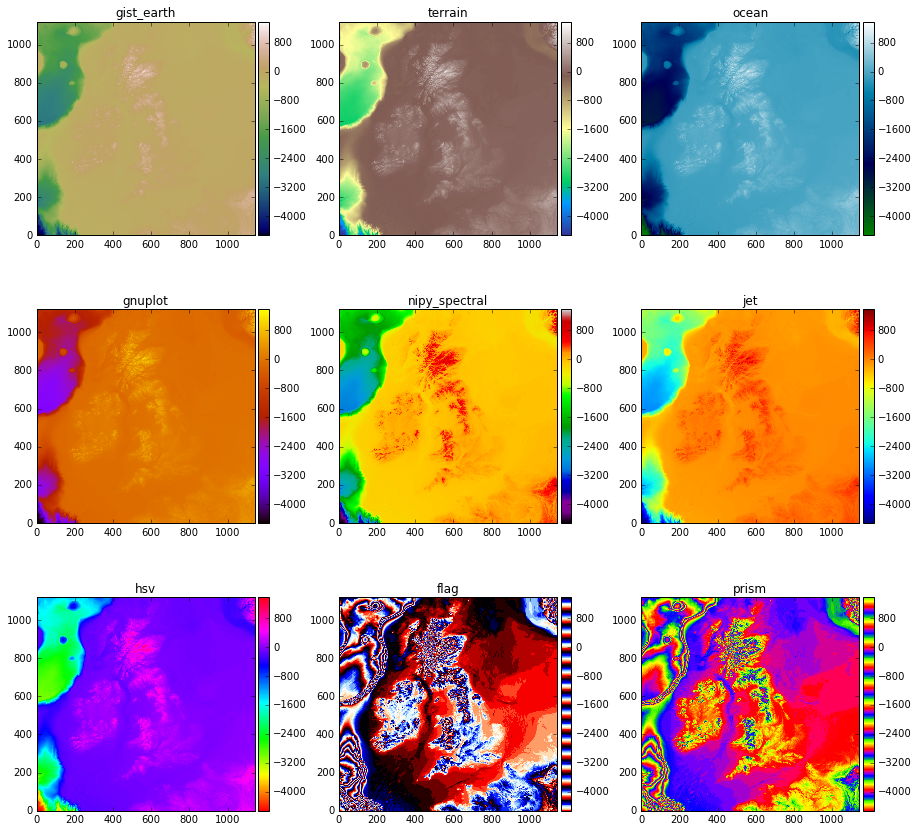

In [16]:
# Use compare_colormaps() to visualise miscellaneous colormaps in this cell
cmaps = ('gist_earth', 'terrain', 'ocean',
         'gnuplot', 'nipy_spectral', 'jet',
         'hsv', 'flag', 'prism')
compare_colormaps(data.variables['altitude'].data, cmaps)

***QUESTION:*** How does each of these palettes influence your interpretation of the array data?

***QUESTION:*** Which of these palettes (if any) do you think gives the most appropriate representation of your data?

***QUESTION:*** What do you think would be the properties of a colormap that *best* represents the data, and why?

<div class="alert alert-warning">
<b>Normalising colormaps</b>
</div>

It will be fairly obvious to you that the dataset you are working with is some kind of geographical, topological data. This brings with it some kinds of expectations when visualising the data:

1. That sea and land will be coloured differently
2. That altitudes below sea level are probably covered by sea (though not always...), and that sea level has an 'altitude' of zero

The colourmaps `gist_earth` and `terrain` look like they should give us sensible colours for geographical data, but as we can see by plotting our data with those colormaps, the shore boundaries do not look to be correct, in that they do not separate land from sea very well.

```python
cmaps = ('gist_earth', 'terrain', 'ocean')
compare_colormaps(data.variables['altitude'].data, cmaps)
```

In [17]:
# Plot the data with topological colormaps, here
cmaps = ('gist_earth', 'terrain', 'ocean')
compare_colormaps(data.variables['altitude'].data, cmaps)

For all of these colormaps, we can see from the colorbar scales that there does appear to be a transition from blue (sea) to earthy colours or white (land), though these transitions do not coincide with sea level (zero).

To modify these colourmaps to have a more sensible scale, we use `matplotlib`'s colormap normalisation.

* `matplotlib` colormap normalisation: [http://matplotlib.org/users/colormapnorms.html](http://matplotlib.org/users/colormapnorms.html)

The principle behind the normalisation we want to use is that our data (`data[altitude']`) spans a range of values from some minimum to some maximum: `vmin` to `vmax`. Values of zero in our dataset refer to measurements of terrain at sea level, and should correspond to the transition from sea colours to earth colours in our colormaps.

If we consider each colormap to span a range of values from 0..1, the sealevel transition occurs at a different point for each colormap:

* `gist_earth`: sealevel ≈0.33
* `terrain`: sealevel ≈0.2
* `ocean`: sealevel ≈0.95

So we would like to define two linear scales for each colormap: one mapping those datapoints in the range `[vmin..0]` to  `[0..sealevel]` on the colormap; and one mapping data in the range `(0..vmax]` to `(sealevel..1]` on the colormap.

This is a two-step process. First we define a normalisation that *maps* our data to these two scales, and then use this when rendering our data with `imshow()`. To define the normalisation, we need to create a subclass of `matplotlib`'s `colors.Normalize` class. This is relatively technical Python compared to the rest of the workshop, so you can skip over the code in the next cell that implements this, if you find it too difficult.

In [18]:
# Code defining three classes for normalising our data to
# topographically-relevant colormaps
class GIST_EarthNormalize(mpl.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, sealevel=None, clip=False):
        self.sealevel = sealevel
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.sealevel, self.vmax], [0, 0.2, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
class TerrainNormalize(mpl.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, sealevel=None, clip=False):
        self.sealevel = sealevel
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.sealevel, self.vmax], [0, 0.2, 1]
        return np.ma.masked_array(np.interp(value, x, y)) 

# OceanNormalize doesn't have a straightforward pair of linear scales
# The altitude between sealevel and sealevel-10 is expanded between
# 0.875 and 0.95, which gives a crisper shoreline
class OceanNormalize(mpl.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, sealevel=None, clip=False):
        self.sealevel = sealevel
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.sealevel-10, self.sealevel, self.vmax], [0, 0.875, 0.95, 1]
        return np.ma.masked_array(np.interp(value, x, y)) 

Now, when we use `imshow()` to visualise our data, we can employ one of these classes to normalise our data so that values above zero are (approximately) coloured as if they were above sea level, and values below zero are (approximately) covered as if they are covered by water.

The first step is to instantiate our normalisation object with the minimum and maximum values of data we wish to map, along with a data value that represents sea level (here, zero). We have to use `data['altitude'][:]` to copy the NetCDF data to an array, in order to use the `.min()` and `.max()` methods.

Next, we pass the argument `norm` to the `imshow()` function when we call it, in order to have the function normalise our data automatically.

```python
norm = OceanNormalize(vmin=data.variables['altitude'].actual_range[0],
                      vmax=data.variables['altitude'].actual_range[1],
                      sealevel=0)
imshow(data.variables['altitude'].data, origin='lower', cmap='ocean', norm=norm)
colorbar()
```

This should render the image with a more familiar colour scheme.

In [19]:
# Display data with normalised values for each colormap
norm = TerrainNormalize(vmin=data.variables['altitude'].actual_range[0],
                        vmax=data.variables['altitude'].actual_range[1],
                        sealevel=0)
imshow(data.variables['altitude'].data, origin='lower', cmap='terrain', norm=norm)
colorbar();


<div class="alert alert-success">
<h3>4. 3D representation of 2D array data</h3>
</div>

#### Python imports

The `matplotlib` libraries also provides tools for rendering 3D images of data. These are contained in the `Axes3D` module, which can be imported with:

```python
from mpl_toolkits.mplot3d import Axes3D
```

This makes available several functions for plotting of 3D data, including `plot3D()`, `plot_wireframe()`, `quiver3D()` (3D field plots with arrows), and `scatter3D()`. 

In [20]:
from mpl_toolkits.mplot3d import Axes3D

#### Preparing data

For our data, which by now we realise describes a portion of the planet's surface, the function we will use is `plot_surface()`. Our goal is to make the *x* and *y* co-ordinates of the 3D plot be the longitude (`lon`) and latitude (`lat`), respectively, and for the `altitude` variable to control the 'height' of the surface on the *z* axis. This is, usefully, the natural shape of the data in our NetCDF file.

Our first action is to describe the *x* and *y* co-ordinates as a `meshgrid`: two arrays of *x* and *y* values that, when combined, are tuples that define points on the lower face of the 
3D graphing space. To do this, we define two *linear spaces*: evenly-spaced points beteween the maximum and minimum values of latitude and longitude in our data. The `numpy` function `linspace()` can be used to do this.

* `linspace`: [documentation](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

```python
x = linspace(data.variables['lon'].actual_range[0],
             data.variables['lon'].actual_range[1],
             data.variables['lon'].shape[0])
y = linspace(data.variables['lat'].actual_range[0],
             data.variables['lat'].actual_range[1],
             data.variables['lat'].shape[0])
```

To get minimum and maximum values for each variable we have used the `.actual_range` attribute, which returns a `(min, max)` tuple for a `netcdf_variable` object. We have also used the `.shape` attribute (which returns a tuple of dimensions of the data) to determine the number of steps we need to define in linear space.

The output can be visualised with

```python
print(x)
```

and seen to be a vector of evenly-spaced values from the minimum to the maximum value of the appropriate variable.

In [21]:
# Create linear spaces x and y for longitude and latitude data, and inspect the values
x = linspace(data.variables['lon'].actual_range[0],
             data.variables['lon'].actual_range[1],
             data.variables['lon'].shape[0])
y = linspace(data.variables['lat'].actual_range[0],
             data.variables['lat'].actual_range[1],
             data.variables['lat'].shape[0])
print(x)

[-13.5        -13.48240648 -13.46481297 ...,   6.55660984   6.57420336
   6.59179688]


The next step is to create a 2D *grid* or *mesh* combining these values, so that each `(lon, lat)` tuple corresponds to a single point in the `altitude` dataset. We use `NumPy`'s `meshgrid` command to do this, placing the output into `xgrid` and `ygrid` - *x* and *y* co-ordinates for each point in `data.variables['altitude']`:

```python
xgrid, ygrid = meshgrid(x, y)
```

The properties of these arrays can be inspected:

```python
xgrid.shape()
```

and confirmed to be the same dimensions as the `altitude` data.

In [22]:
# Create the meshgrid in xgrid and ygrid, and confirm their dimensions
# are the same as those of the altitude data
xgrid, ygrid = meshgrid(x, y)
xgrid.shape, ygrid.shape, data.variables['altitude'].shape

((1121, 1143), (1121, 1143), (1121, 1143))

For convenience, we will assign the 'altitude' data to the variable `z` for plotting:

```python
z = data.variables['altitude'].data
```

In [23]:
# Create the convenience variable z that holds the altitude data
z = data.variables['altitude'].data

#### Constructing the plot

To render a basic 3D plot, we will create a `matplotlib` `Figure`, to which we will add a `subplot` (referred to as our *axes*, and assigned to `ax`). We need to tell the `subplot` that we want a 3D projection of the data, and then call the `ax.plot_surface()` function to draw the surface, as the object `surf` (this allows us to refer to elements of the surface):

```python
fig = figure()  # The figure() holds the axes
ax = fig.add_subplot(111, projection='3d')  # The subplot is the axes
surf = ax.plot_surface(xgrid, ygrid,  # We provide x,y meshgrid locations
                       data.variables['altitude'].data)
```

In [24]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xgrid, ygrid, z)

This is a pretty uninspiring plot. It's just a small, dark surface, and we can't see any detail. We can try increasing the size of the figure, by passing `figsize=(20, 15)` as an argument to `figure()` when creating the plot:

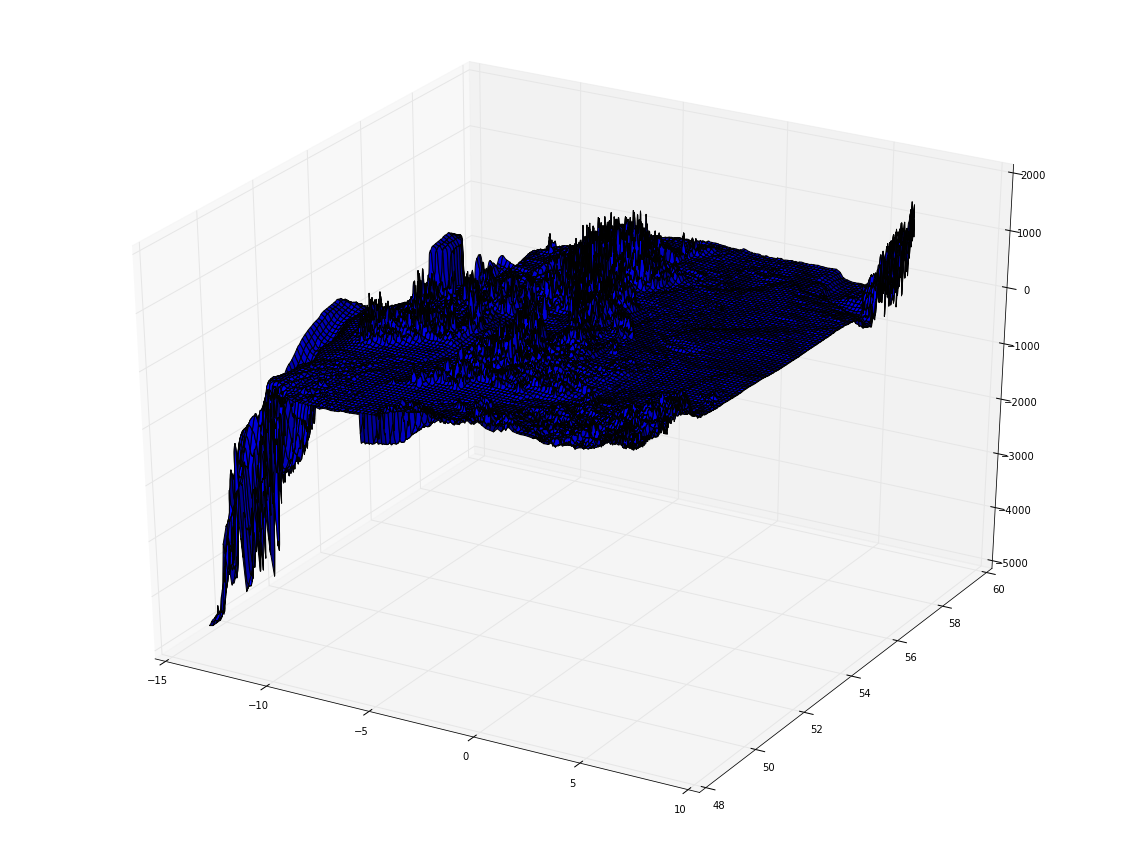

In [25]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xgrid, ygrid, z)

Now the plot is bigger, but we have not solved our visualisation problem.

One of the factors preventing us from seeing detail here is how the 3D surface is represented. It is composed of *lines* that connect the datapoints on the surface, and *faces* that lie between the datapoints. Currently, the lines are so close together that we cannot see the colours of the faces.

We can try removing the lines to see what effect this have. We can also subsample the surface less finely, in order to see clearly what's going on with the faces. To do this, we set `linewidth=0`, and `cstride` and `rstride` to skip 100 values in each direction, in our call to `plot_surface()`:

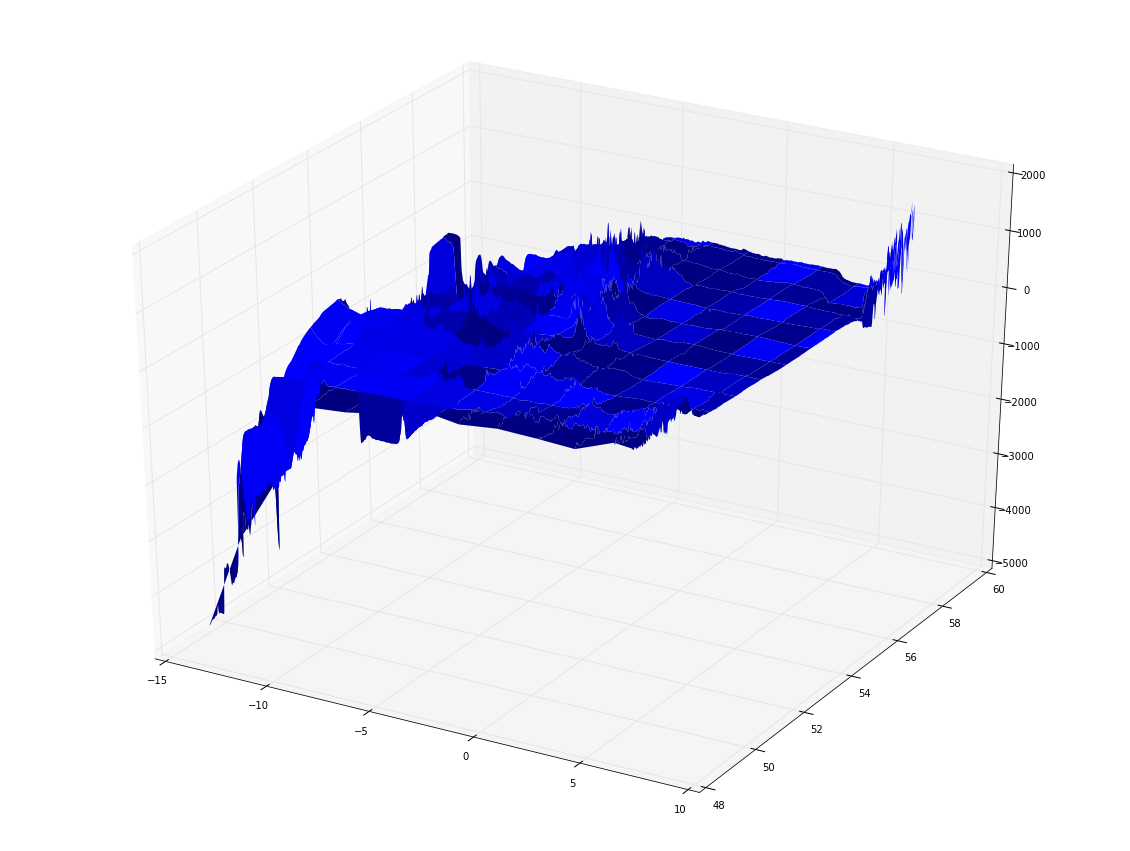

In [26]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xgrid, ygrid, z,
                       cstride=100, rstride=100,
                       linewidth=0)

Now we can see only the faces of the surface plot, but it's not very clear, still. It's possible to add a colormap with the `cmap` and `norm` arguments to `plot_surface()`, just as for 2D plots. But, when we try this with the `cm.gist_earth` colormap, the results are disappointing:

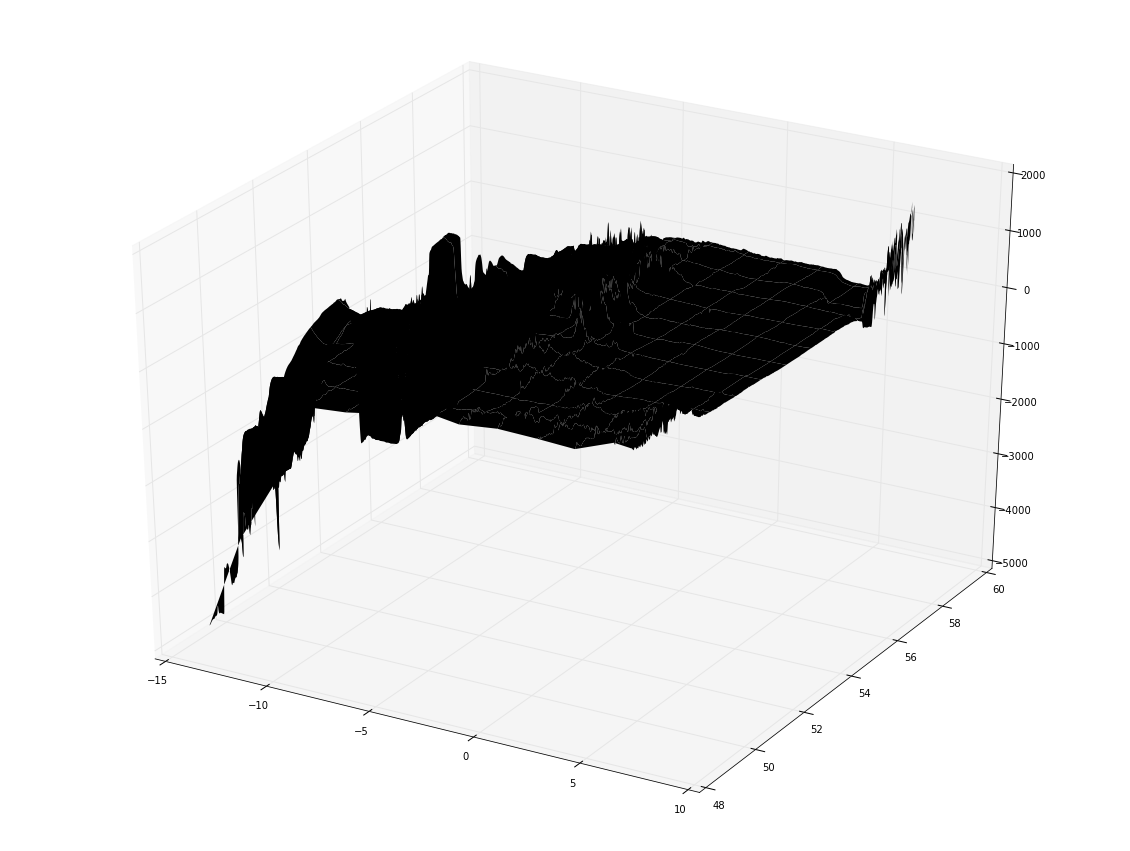

In [27]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

norm_ge = TerrainNormalize(vmin=z.min(), vmax=z.max(), sealevel=0)

surf = ax.plot_surface(xgrid, ygrid, z,
                       linewidth=0,
                       cstride=100, rstride=100,
                       cmap=cm.gist_earth, norm=norm_ge)

The problem we have here is that our data array, `z`, contains non-numeric values: `nan`s, as can be seen by inspection. Rather than using `z.max()` and `z.min()`, which return `nan` as both the minimum and maximum data values for scaling, we need to use the `NumPy` functions `nanmin()` and `nanmax()` to ignore those values.

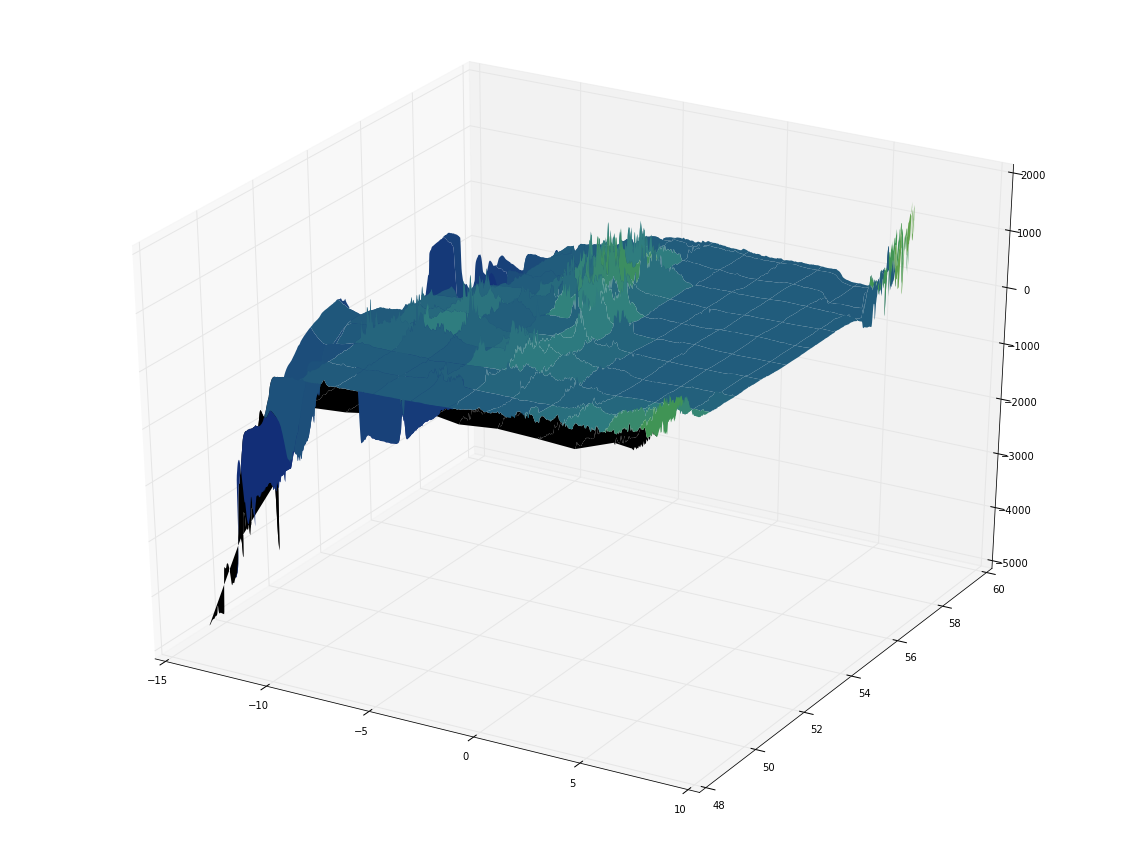

In [28]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

norm_ge = GIST_EarthNormalize(vmin=nanmin(z), vmax=nanmax(z), sealevel=0)

surf = ax.plot_surface(xgrid, ygrid, z,
                       linewidth=0,
                       cstride=100, rstride=100,
                       cmap=cm.gist_earth, norm=norm_ge)

Reducing the number of values in the dataset we skip by reducing the values for `cstride` and `rstride`, more detail can be shown.

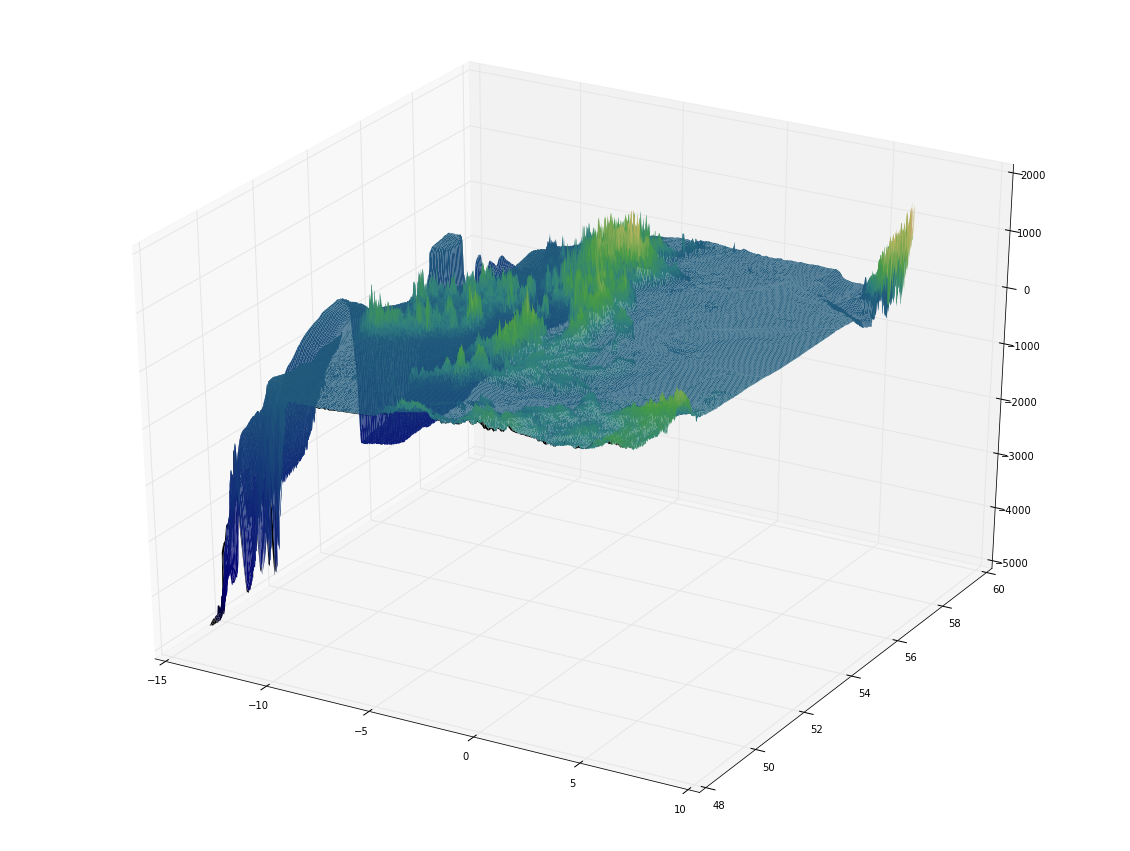

In [29]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

norm_ge = GIST_EarthNormalize(vmin=nanmin(z), vmax=nanmax(z), sealevel=0)

surf = ax.plot_surface(xgrid, ygrid, z,
                       linewidth=0,
                       cstride=5, rstride=5,
                       cmap=cm.gist_earth, norm=norm_ge)

The axes can be rotated with `ax.view_init()`, passing the angle above the horizon, and the bearing from which we view the axes, to give a clearer view of the map:

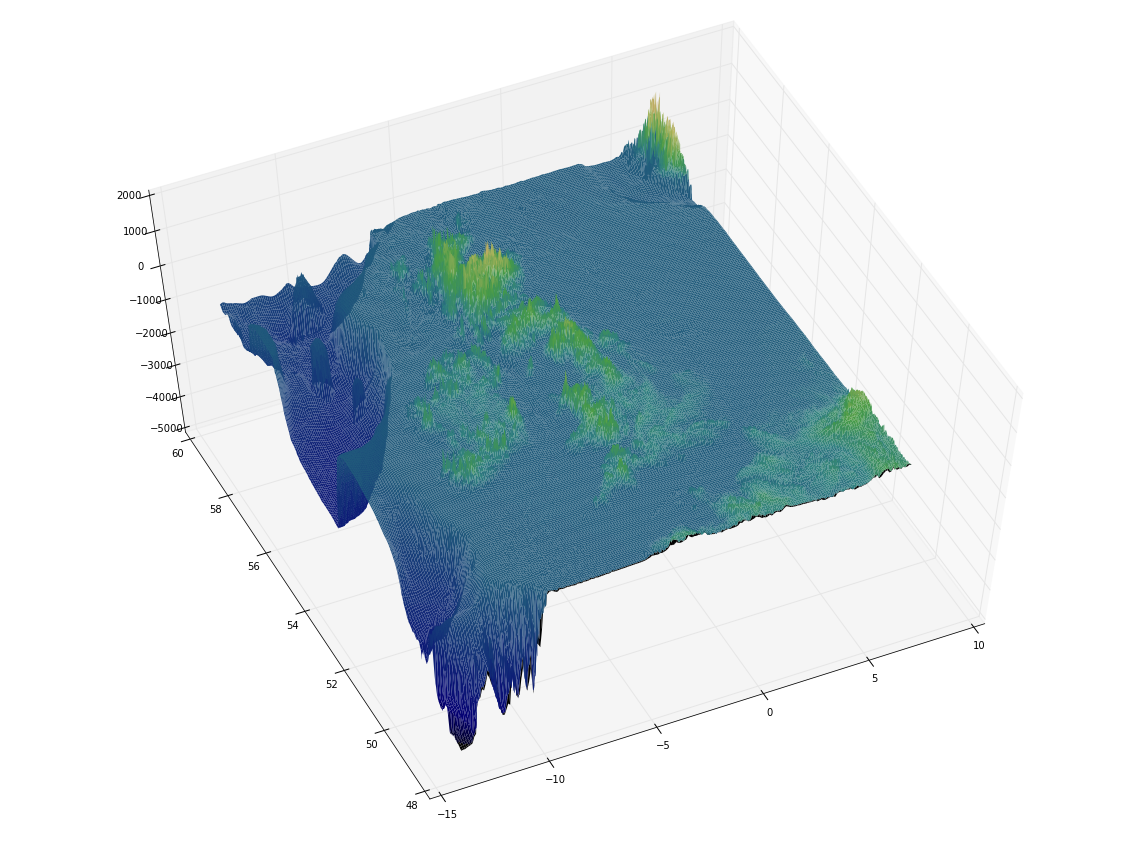

In [30]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 245)

norm_ge = GIST_EarthNormalize(vmin=nanmin(z), vmax=nanmax(z), sealevel=0)

surf = ax.plot_surface(xgrid, ygrid, z,
                       linewidth=0,
                       cstride=5, rstride=5,
                       cmap=cm.gist_earth, norm=norm_ge)

Now we can see coloured faces of the surface plot, and it's a pretty clear 3D map of elevation and depth for a view on the UK and Ireland.

We can add a colorbar scale with the `colorbar()` function, just as for 2D plots. We need to tell it what the graph surface is so that it can relate datapoint values to colours, and it can help to `shrink` the scale so it does not dominate the plot.

In [31]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 245)

norm_ge = GIST_EarthNormalize(vmin=nanmin(z), vmax=nanmax(z), sealevel=0)

surf = ax.plot_surface(xgrid, ygrid, z,
                       linewidth=0,
                       cstride=5, rstride=5,
                       cmap=cm.gist_earth, norm=norm_ge)

colorbar(surf, shrink=0.5)

To be a little more fancy, we could add a different kind of colouring, using *shaders*.

To do this, we add a lightsource: the `mpl.colors.LightSource()` object, setting its location (azimuth and altitude) to cast some light.

We are in full control of the lightsource, and can use it to *shade* each face of the surface individually by calling its `shade()` method, for which we can provide a colormap, and a normalisation function, as for 2D plots.

We could set `shade=True` and `antialiased=True` for a smoother rendering, if we liked.

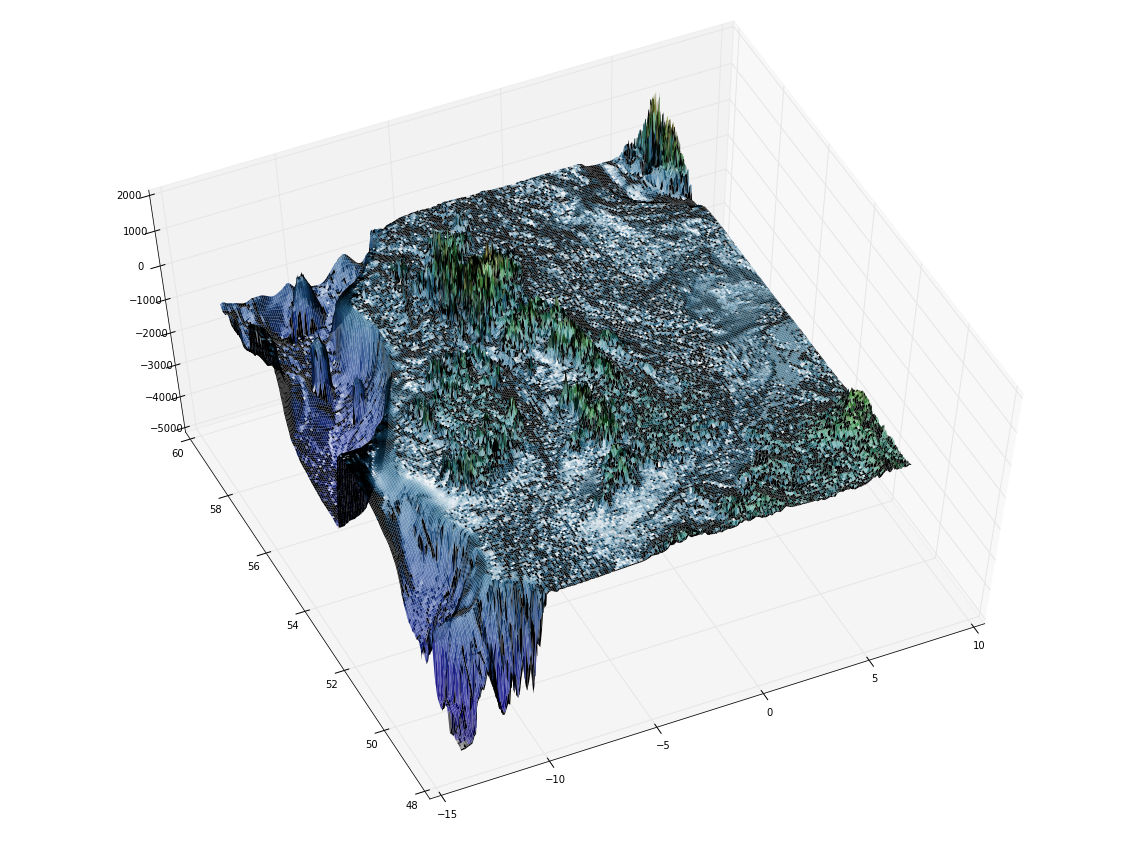

In [32]:
fig = figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 245)

norm_ge = GIST_EarthNormalize(vmin=nanmin(z), vmax=nanmax(z), sealevel=0)

ls = mpl.colors.LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(z, cmap=cm.gist_earth, norm=norm_ge)

surf = ax.plot_surface(xgrid, ygrid, z,
                       linewidth=0,
                       cstride=5, rstride=5,
                       facecolors=rgb)